In [8]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
pyber = pd.merge(ride_data,city_data, on="city", how="left")
# Display the data table for preview
pyber.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

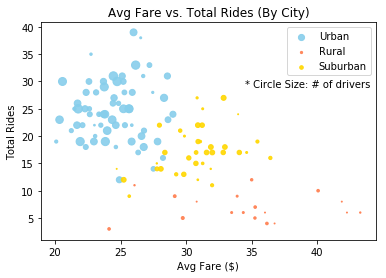

In [74]:
# Obtain the x and y coordinates for each of the three city types
urban = pyber.loc[pyber["type"] == "Urban"]
rural = pyber.loc[pyber["type"] == "Rural"]
suburban = pyber.loc[pyber["type"] == "Suburban"]

urban_avg_fare = urban.groupby('city').mean()["fare"]
urban_total_rides = urban.groupby('city').count()["fare"]
urban_drivers_per_city = urban.groupby('city').mean()["driver_count"]

rural_avg_fare = rural.groupby('city').mean()["fare"]
rural_total_rides = rural.groupby('city').count()["fare"]
rural_drivers_per_city = rural.groupby('city').mean()["driver_count"]

suburban_avg_fare = suburban.groupby('city').mean()["fare"]
suburban_total_rides = suburban.groupby('city').count()["fare"]
suburban_drivers_per_city = suburban.groupby('city').mean()["driver_count"]

# Build the scatter plots for each city types
plt.scatter(urban_avg_fare, urban_total_rides, marker="o", facecolors="skyblue", label = "urban",
            s = urban_drivers_per_city, alpha = .9)
plt.scatter(rural_avg_fare, rural_total_rides, marker="o", facecolors="coral", label = "rural",
            s = rural_drivers_per_city,alpha = .9)
plt.scatter(suburban_avg_fare, suburban_total_rides, marker="o", facecolors="gold", label = "suburban",
            s = suburban_drivers_per_city,alpha = .9)

# Incorporate the other graph properties
# Create a title, x label, and y label for our chart
plt.title("Avg Fare vs. Total Rides (By City)")
plt.xlabel("Avg Fare ($)")
plt.ylabel("Total Rides")

# Create a legend
plt.legend(['Urban', 'Rural','Suburban'], loc=1) 
# Incorporate a text label regarding circle size
plt.annotate(xy=[34.5,29], s='* Circle Size: # of drivers')

# Save Figure
plt.savefig("pyber_bubble_plot.png")

In [115]:
# Show plot
plt.show()

## Total Fares by City Type

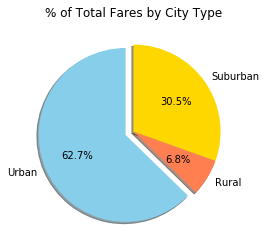

In [114]:
# Calculate Type Percents
urban_percent = pyber.loc[pyber["type"] == "Urban"].sum()["fare"]/pyber.sum()["fare"]
rural_percent = pyber.loc[pyber["type"] == "Rural"].sum()["fare"]/pyber.sum()["fare"]
suburban_percent = pyber.loc[pyber["type"] == "Suburban"].sum()["fare"]/pyber.sum()["fare"]
# Build Pie Chart
labels = ["Urban", "Rural","Suburban"]
sizes = [urban_percent, rural_percent, suburban_percent]
explode = (0.1, 0, 0)  # only "explode" 1st slice (i.e. 'Urban')

plt.pie(sizes, labels = labels, autopct='%1.1f%%', explode = explode, shadow = True, startangle=90, colors = ["skyblue","coral","gold"])
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("pyber_fares_by_city_pie.png")

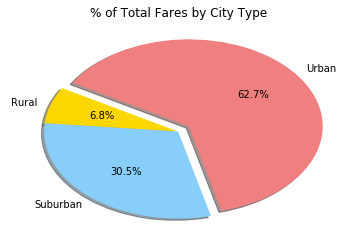

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

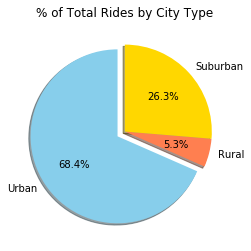

In [112]:
# Calculate Ride Percents
urban_percent = pyber.loc[pyber["type"] == "Urban"].count()["city"]/pyber.count()["city"]
rural_percent = pyber.loc[pyber["type"] == "Rural"].count()["city"]/pyber.count()["city"]
suburban_percent = pyber.loc[pyber["type"] == "Suburban"].count()["city"]/pyber.count()["city"]
# Build Pie Chart
labels = ["Urban", "Rural","Suburban"]
sizes = [urban_percent, rural_percent, suburban_percent]
explode = (0.1, 0, 0)  # only "explode" 1st slice (i.e. 'Urban')

plt.pie(sizes, labels = labels, autopct='%1.1f%%', explode = explode, shadow = True, startangle=90, colors = ["skyblue","coral","gold"])
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("pyber_rides_by_city_pie.png")

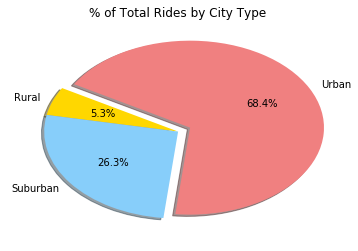

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

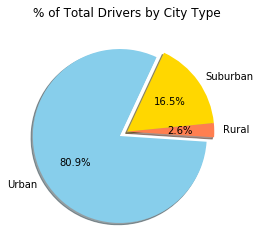

In [113]:
# Calculate Driver Percents
urban_percent = city_data.loc[city_data["type"] == "Urban"].sum()["driver_count"]/city_data["driver_count"].sum()
rural_percent = city_data.loc[city_data["type"] == "Rural"].sum()["driver_count"]/city_data["driver_count"].sum()
suburban_percent = city_data.loc[city_data["type"] == "Suburban"].sum()["driver_count"]/city_data["driver_count"].sum()
# Build Pie Chart
labels = ["Urban", "Rural","Suburban"]
sizes = [urban_percent, rural_percent, suburban_percent]
explode = (0.1, 0, 0)  # only "explode" 1st slice (i.e. 'Urban')

plt.pie(sizes, labels = labels, autopct='%1.1f%%', explode = explode, shadow = True, startangle=65, colors = ["skyblue","coral","gold"])
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig("pyber_drivers_by_city_pie.png")


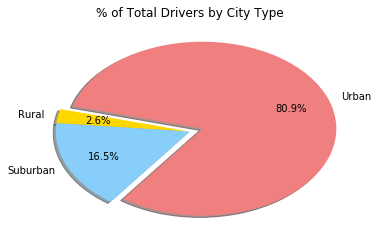

In [6]:
# Show Figure
plt.show()

In [ ]:
#  Observable Trends
# 1. As number of rides (demand) in a city increases, so does the average price of a fair (price) 
#    demonstrating an upward sloping demand curve for pybers

# 2. Urban cities have the largest percentage of total drivers which isn't surprising 
#    (would like to see drivers per capita statistic)

# 3. Suburban drivers seem to get a large percentage of fairs and rides even though they have a 
#    relatively lower percentage of total drivers